In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Exploration

In [2]:
sample = pd.read_csv('sample.csv')
print(sample.shape)
print(sample.columns)

(100000, 25)
Index(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')


In [3]:
sample.head()


,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [4]:
sample.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [5]:
print("# Unique countries:", sample['user_location_country'].nunique())
print("# Unique regions:", sample['user_location_region'].nunique())
print("# Unique cities:", sample['user_location_city'].nunique())
print("Range Date:", sample['date_time'].min(), " - ", sample['date_time'].max())


# Unique countries: 201
# Unique regions: 779
# Unique cities: 10779
Range Date: 2013-01-07 00:33:47  -  2014-12-31 23:47:14


In [30]:
print("Cols Types:", sample.dtypes)
print()
sample.info()


Cols Types: Unnamed: 0                            int64
date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country       

In [31]:
# unique counts
def unique_counts(sample):
   for i in sample.columns:
       count = sample[i].nunique()
       print(i, ": ", count)

In [8]:
tab_info=pd.DataFrame(sample.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(sample.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(sample.isnull().sum()/sample.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
column type,int64,object,int64,int64,int64,int64,int64,float64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
null values (nb),0,0,0,0,0,0,0,36085,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,36.085,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# correlations
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
sample.groupby('srch_rm_cnt')['is_booking'].mean()
sample['srch_children_cnt'].corr(sample['is_booking'])
sample.corr()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A68446B38>,
      dtype=object)

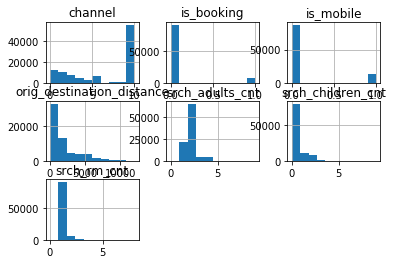

In [10]:
# sample.hist()
sample[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist()


In [11]:
# distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


num_of_bookings
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [12]:
sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())
sample

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2
5,4691128,2014-07-22 12:22:25,11,3,205,411,54864,209.6633,106611,0,...,1,9819,3,0,2,2,198,1234,90,2
6,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,12812,5,0,1,2,50,368,83,1
7,34825186,2014-12-16 14:34:39,2,3,66,220,38273,53.7481,260938,0,...,1,3448,3,0,1,2,50,582,54,1
8,24023139,2014-01-28 13:16:36,2,3,66,337,54287,329.1833,908558,0,...,1,8287,1,1,1,2,198,400,6,1
9,8184643,2014-02-27 08:29:19,24,2,3,38,4999,NaN,1161104,0,...,1,8856,1,0,1,2,50,636,0,1


In [13]:
# distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count')

mean
0.000000    80991
0.200000        5
0.250000       35
0.333333      153
0.400000        1
0.500000     1054
0.600000        1
0.666667       26
0.750000        1
1.000000     6596
Name: user_id, dtype: int64

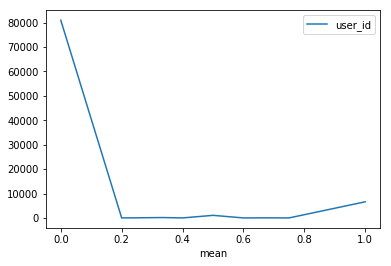

In [14]:
(sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index()).plot(x='mean', y='user_id')

# explore the data - validate data

In [15]:
#number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index)

sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date

sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']]
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


# explore the data - create new variables that might be useufl 

In [16]:
#####################explore the data - create new variables that might be useufl###########
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

sample['duration'] = sample.apply(duration, axis=1)
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

In [17]:
############## Outperforming/underperforming segments #############
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

In [18]:
# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


    site_name  booking_rate  num_of_bookings
35         44      0.000000                0
10         16      0.000000                0
29         35      0.025271                7
27         33      0.036170               17
12         18      0.036603               25
1           6      0.037037                2
39         48      0.039216                2
15         21      0.041667                2
30         36      0.042017                5
26         32      0.050000               12
19         25      0.052727               29
37         46      0.054945                5
21         27      0.059259               16
13         19      0.060606                2
3           8      0.061489              152
8          14      0.062500                9
20         26      0.062814               25
17         23      0.064024              126
2           7      0.064935                5
33         40      0.065217                9
18         24      0.066398              428
5         

      hotel_market  booking_rate  num_of_bookings
0                0      0.000000                0
859            904      0.000000                0
860            905      0.000000                0
861            907      0.000000                0
1568          1737      0.000000                0
863            909      0.000000                0
1566          1734      0.000000                0
865            911      0.000000                0
866            912      0.000000                0
867            914      0.000000                0
868            915      0.000000                0
869            917      0.000000                0
870            918      0.000000                0
872            920      0.000000                0
873            921      0.000000                0
874            922      0.000000                0
875            923      0.000000                0
876            924      0.000000                0
877            925      0.000000                0


In [19]:
# booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,channel,booking_rate,num_of_bookings
7,7,0.043157,35
8,8,0.055351,15
3,3,0.060400,266
2,2,0.060490,474
6,6,0.067901,11
1,1,0.069690,716
0,0,0.071948,901
9,9,0.085381,4726
5,5,0.094349,581
4,4,0.120784,265


In [20]:
sample['is_booking'].mean()

0.07993

In [21]:
#test performance of mean vs booking rate

In [22]:
############## Outperforming/underperforming segments - two sample t test #############
def stats_comparison(i):
    sample.groupby(i)['is_booking'].agg({'average': 'mean','bookings': 'count'}).reset_index()
    cat = sample.groupby(i)['is_booking'].agg({'sub_average': 'mean','sub_bookings': 'count'}).reset_index()
    
    cat['overall_average'] = sample['is_booking'].mean()
    cat['overall_bookings'] = sample['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)



In [23]:
stats_comparison('channel')

    channel  sub_average  sub_bookings  overall_average  overall_bookings  \
0         0     0.071948         12523          0.07993            100000   
1         1     0.069690         10274          0.07993            100000   
2         2     0.060490          7836          0.07993            100000   
3         3     0.060400          4404          0.07993            100000   
4         4     0.120784          2194          0.07993            100000   
5         5     0.094349          6158          0.07993            100000   
6         6     0.067901           162          0.07993            100000   
7         7     0.043157           811          0.07993            100000   
8         8     0.055351           271          0.07993            100000   
9         9     0.085381         55352          0.07993            100000   
10       10     0.200000            15          0.07993            100000   

    rest_bookings  rest_average   z_score          prob  significant  
0   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


# Clustering

In [24]:
############## clustering - what are the similar user cities? ##############

# Step 1: what are the features I am going to use (that make sense)?
# What features may distinguish cities? based on business sense and exploratory analysis

num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)
city_groups


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.000000,78.500000,2315.836250,0.000000,0.250000,1.750000,0.000000,1.000000
1,3,4.562500,92.250000,3550.017500,0.062500,0.250000,1.937500,0.500000,1.000000
2,7,14.000000,58.000000,5994.864000,0.000000,1.000000,2.000000,0.000000,1.000000
3,14,7.000000,35.750000,5342.819100,0.000000,0.000000,2.000000,0.750000,1.000000
4,21,5.000000,31.500000,2165.768900,0.000000,0.500000,1.500000,1.000000,1.000000
5,22,6.000000,127.000000,6759.057100,0.000000,1.000000,2.000000,0.000000,1.000000
6,40,3.583333,56.000000,1490.843325,0.166667,0.333333,2.333333,0.333333,1.166667
7,50,2.466667,50.466667,2573.263960,0.133333,0.066667,1.866667,0.200000,1.000000
8,53,4.500000,25.000000,2267.866925,0.250000,0.000000,1.750000,0.250000,1.000000
9,69,2.333333,55.000000,499.035733,0.333333,0.333333,1.666667,0.000000,1.000000


In [25]:
# Step 2: shall I standardise the data?
# What is the magnitude of data range?
city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])
city_groups_std


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558
5,22,1.264925,1.524857,3.083355,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
6,40,0.101844,-0.007459,-0.189738,0.140286,0.271656,0.402743,-0.055959,0.125324
7,50,-0.435580,-0.126879,0.482760,-0.007064,-0.610167,-0.307262,-0.304792,-0.325558
8,53,0.543012,-0.676498,0.293020,0.508658,-0.830623,-0.484763,-0.211480,-0.325558
9,69,-0.499750,-0.029041,-0.805939,0.877031,0.271656,-0.611550,-0.678042,-0.325558


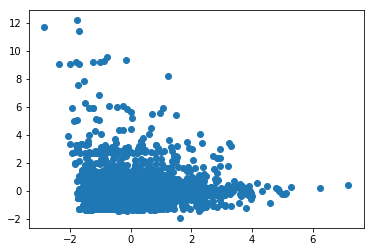

In [26]:
# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])

city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]

plt.scatter(city_groups_std['x'], city_groups_std['y'])
plt.show()

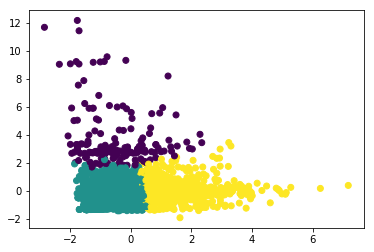

In [27]:
# Step 3: select clustering method and number of clusters
# The Elbow methods? choose a K so that the sum of the square error of the distances decrease drastically
# using an ad-hoc k=3 here, there are methods to help derive the optimal number for k

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])

# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])

city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]

plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()



In [28]:
# Step 4: profile the clusters
# merging the two
# dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column

# Step 5: assess the statistical robustness
# A statistically robust segmentation return similar results using different clustering methodologies


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412
1,28061.003667,2.751534,41.219138,1351.796096,0.143040,0.175468,1.982580,0.367642,1.072436
2,28921.684882,5.268064,101.581612,3158.093982,0.110599,0.486154,2.014091,0.321231,1.068508


In [29]:
city_groups.groupby('cluster')

KeyError: 'cluster'

In [ ]:
############### decision tree - what lead to a higher chance of booking for individuals? ###############
from sklearn.cross_validation import train_test_split

# choose a cluster and split them into test and train
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], 
                      left_on='user_location_city', 
                      right_on='user_location_city', 
                      how='outer')

sample.groupby('cluster')['is_booking'].count()

# choose one of the city clusters to analyze
tree_data = sample.dropna(axis = 0)[sample['cluster']==1]
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])

# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=8, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])

test_preds = clf.predict(X = tree_test[num_list])
clf.predict_proba(tree_test[num_list])

# scoring of the prediction model
print(clf.score(tree_test[num_list], tree_test['is_booking']))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

# visualize the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
conda_fix(graph)
graph.write_pdf("booking_tree.pdf")
Image(graph.create_png())

In [ ]:
############### Logistic regression - what lead to a higher chance of booking for individuals? ###############
#create dummy variable channel
sample['channel'].value_counts()
sample['new_channel'] = [i if i in [9, 0, 1, 2] else 'other' for i in sample['channel']]
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')
sample = sample.join(dummy_channels.iloc[:, :])
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]

var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_1',
            'channel_2', 'channel_9', 'channel_other']

# create logistic estimator
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()

# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)



In [ ]:
# predicted values
sample['pred'] = result.predict(sample[var_list])

# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()

def plot_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')
    # pl.show()
plot_vs_marketing_channel('days_in_advance')